In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

from scipy.optimize import curve_fit

In [3]:
savefolder = "/Users/your/savefolder"
datafolder = "/Users/your/datafolder"

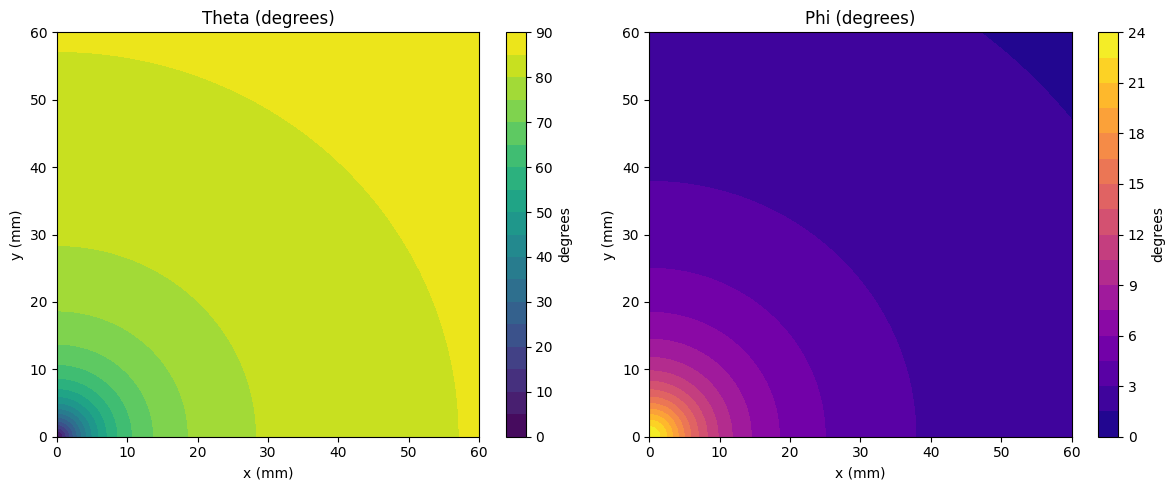

For a dot at position x=10mm, y=10mm:
Theta = 70.53 degrees
Phi = 7.66 degrees


In [4]:
## Calculate the angle changes of dot motion stimuli
## calculate theta (angle from sensor axis to ground)
## calculate phi (angular width of the circle from sensor's perspective)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
h = 5  # height of sensor above ground (mm)
r = 2  # radius of circular dot (mm)
z_plane = 0  # z-coordinate of the ground plane

# Function to calculate theta (angle from sensor axis to ground)
def calculate_theta(x, y, h):
    # Distance from sensor to dot center
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Theta is the angle between the vector to the dot and the vertical axis
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

# Function to calculate phi (angular width of the circle from sensor's perspective)
def calculate_phi(x, y, h, r):
    # Distance from sensor to dot center
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Phi is the angular radius of the circle from sensor's perspective
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

# Example: Calculate theta and phi for various positions
x_range = np.linspace(0, 60, 100)
y_range = np.linspace(0, 60, 100)

# Create a grid of points
X, Y = np.meshgrid(x_range, y_range)
theta_values = calculate_theta(X, Y, h)
phi_values = calculate_phi(X, Y, h, r)

# Visualization
fig = plt.figure(figsize=(12, 5))

# Plot theta
ax1 = fig.add_subplot(121)
contour1 = ax1.contourf(X, Y, theta_values, 20, cmap='viridis')
ax1.set_title('Theta (degrees)')
ax1.set_xlabel('x (mm)')
ax1.set_ylabel('y (mm)')
plt.colorbar(contour1, ax=ax1, label='degrees')

# Plot phi
ax2 = fig.add_subplot(122)
contour2 = ax2.contourf(X, Y, phi_values, 20, cmap='plasma')
ax2.set_title('Phi (degrees)')
ax2.set_xlabel('x (mm)')
ax2.set_ylabel('y (mm)')
plt.colorbar(contour2, ax=ax2, label='degrees')

plt.tight_layout()
plt.show()

# Calculate specific example values
example_x, example_y = 10, 10
print(f"For a dot at position x={example_x}mm, y={example_y}mm:")
print(f"Theta = {calculate_theta(example_x, example_y, h):.2f} degrees")
print(f"Phi = {calculate_phi(example_x, example_y, h, r):.2f} degrees")

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/3415372107.py:24: RuntimeWarning: invalid value encountered in divide
  dtheta_dx_val = (x * h) / (distance**2 * np.sqrt(distance**2 - h**2)) * 180 / np.pi


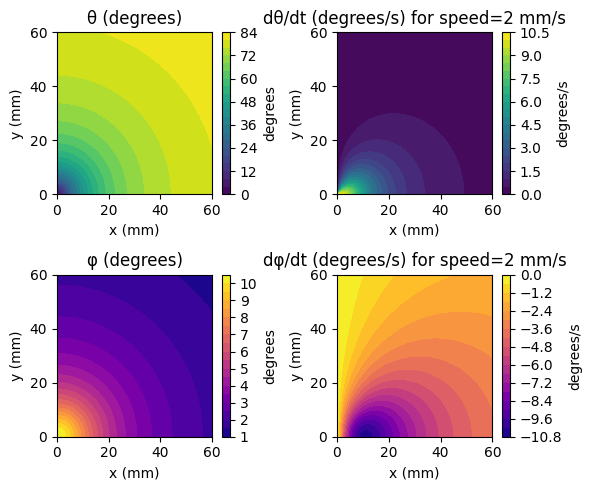

Temporal derivatives for dots moving at 2 mm/s along x-axis:
Position (x,y) | d(Theta)/dt (deg/s) | d(Phi)/dt (deg/s)
------------------------------------------------------------
(5, 0)        |           8.634 |          -7.959
(10, 0)        |           5.704 |         -10.465
(5, 5)        |           5.212 |          -6.781
(10, 10)        |           2.777 |          -7.185


In [5]:
## Calculate the angle changes of dot motion stimuli
## calculate theta (angle from sensor axis to ground)
## calculate phi (angular width of the circle from sensor's perspective)
## Calculate temporal derivatives by multiplying spatial derivatives by speed

import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 11  # height of sensor above ground (mm)
r = 2  # radius of circular dot (mm)
d = 2  # speed of dot movement along x-axis (mm/s)

# Function to calculate theta (angle from sensor axis to ground)
def calculate_theta(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

# Function to calculate phi (angular width of the circle from sensor's perspective)
def calculate_phi(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

# Derivative of theta with respect to x
def dtheta_dx(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dtheta_dx_val = (x * h) / (distance**2 * np.sqrt(distance**2 - h**2)) * 180 / np.pi
    return dtheta_dx_val

# Derivative of phi with respect to x
def dphi_dx(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Using chain rule for arcsin derivative
    dphi_dx_val = -r * x / (distance**2 * np.sqrt(1 - (r/distance)**2)) * 180 / np.pi
    return dphi_dx_val

# Calculate temporal derivatives by multiplying spatial derivatives by speed
def dtheta_dt(x, y, h, speed):
    return dtheta_dx(x, y, h) * speed

def dphi_dt(x, y, h, r, speed):
    return dphi_dx(x, y, h, r) * speed

# Create a grid of positions
x_range = np.linspace(0, 60, 300)
y_range = np.linspace(0, 60, 300)
X, Y = np.meshgrid(x_range, y_range)

# Calculate temporal derivatives
dtheta_dt_values = dtheta_dt(X, Y, h, d)
dphi_dt_values = dphi_dt(X, Y, h, r, d)

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Plot theta
contour1 = axs[0, 0].contourf(X, Y, calculate_theta(X, Y, h), 20, cmap='viridis')
axs[0, 0].set_title('θ (degrees)')
axs[0, 0].set_xlabel('x (mm)')
axs[0, 0].set_ylabel('y (mm)')
plt.colorbar(contour1, ax=axs[0, 0], label='degrees')

# Plot d(theta)/dt
contour2 = axs[0, 1].contourf(X, Y, dtheta_dt_values, 20, cmap='viridis')
axs[0, 1].set_title(f'dθ/dt (degrees/s) for speed={d} mm/s')
axs[0, 1].set_xlabel('x (mm)')
axs[0, 1].set_ylabel('y (mm)')
plt.colorbar(contour2, ax=axs[0, 1], label='degrees/s')

# Plot phi
contour3 = axs[1, 0].contourf(X, Y, calculate_phi(X, Y, h, r), 20, cmap='plasma')
axs[1, 0].set_title('φ (degrees)')
axs[1, 0].set_xlabel('x (mm)')
axs[1, 0].set_ylabel('y (mm)')
plt.colorbar(contour3, ax=axs[1, 0], label='degrees')

# Plot d(phi)/dt
contour4 = axs[1, 1].contourf(X, Y, dphi_dt_values, 20, cmap='plasma')
axs[1, 1].set_title(f'dφ/dt (degrees/s) for speed={d} mm/s')
axs[1, 1].set_xlabel('x (mm)')
axs[1, 1].set_ylabel('y (mm)')
plt.colorbar(contour4, ax=axs[1, 1], label='degrees/s')

plt.tight_layout()
plt.savefig("%s/heatmap_theta_phi_differential_60_h%s.svg" % (savefolder, h))
plt.show()

# Calculate example values at specific positions
example_positions = [(5, 0), (10, 0), (5, 5), (10, 10)]
print("Temporal derivatives for dots moving at", d, "mm/s along x-axis:")
print("Position (x,y) | d(Theta)/dt (deg/s) | d(Phi)/dt (deg/s)")
print("-" * 60)

for x, y in example_positions:
    dt_dt = dtheta_dt(x, y, h, d)
    dp_dt = dphi_dt(x, y, h, r, d)
    print(f"({x}, {y})        | {dt_dt:15.3f} | {dp_dt:15.3f}")
    

(5, 150, 150)


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/2666472336.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars


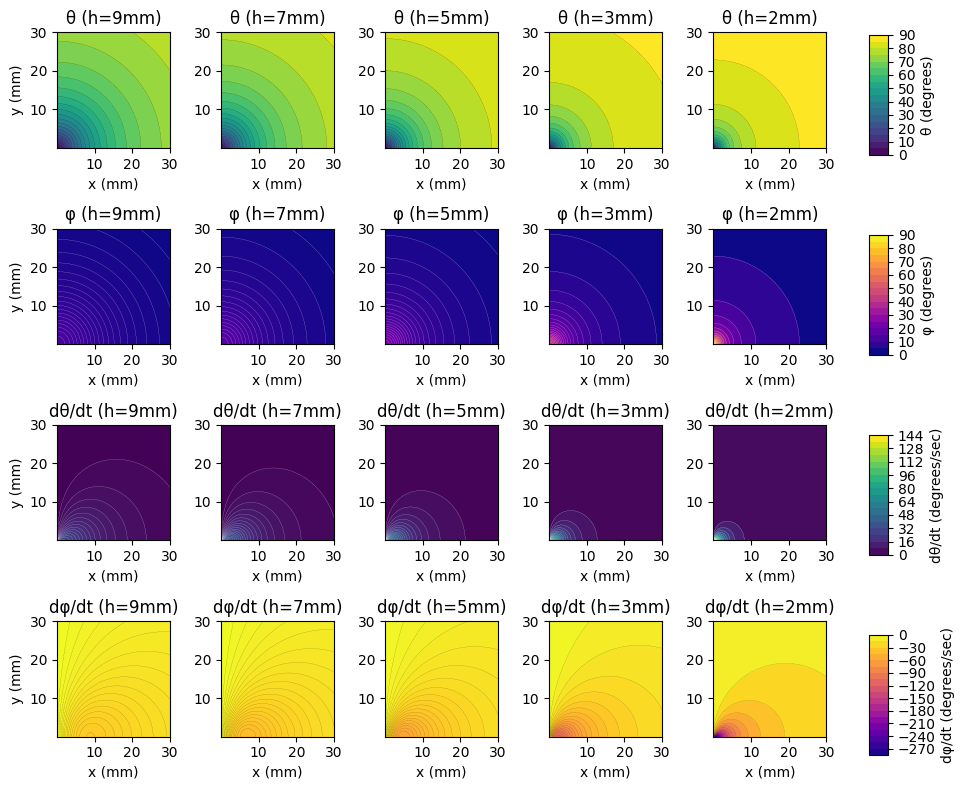

In [6]:
## display the angle changes at different height together

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Parameters
heights = [9,7,5,3,2]#[11,9,7,5,3]  # Different heights to compare
r = 2  # radius of circular dot (mm)
z_plane = 0  # z-coordinate of the ground plane
speed = 5

# Function to calculate theta (angle from sensor axis to ground)
def calculate_theta(x, y, h):
    # Distance from sensor to dot center
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Theta is the angle between the vector to the dot and the vertical axis
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

# Function to calculate phi (angular width of the circle from sensor's perspective)
def calculate_phi(x, y, h, r):
    # Distance from sensor to dot center
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Phi is the angular radius of the circle from sensor's perspective
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

# Derivative of theta with respect to x
def dtheta_dx(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dtheta_dx_val = (x * h) / (distance**2 * np.sqrt(distance**2 - h**2)) * 180 / np.pi
    return dtheta_dx_val

# Derivative of phi with respect to x
def dphi_dx(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    # Using chain rule for arcsin derivative
    dphi_dx_val = -r * x / (distance**2 * np.sqrt(1 - (r/distance)**2)) * 180 / np.pi
    return dphi_dx_val

# Calculate temporal derivatives by multiplying spatial derivatives by speed
def dtheta_dt(x, y, h, speed):
    return dtheta_dx(x, y, h) * speed

def dphi_dt(x, y, h, r, speed):
    return dphi_dx(x, y, h, r) * speed


# Create a grid of points
x_range = np.linspace(0.01, 30, 150)
y_range = np.linspace(0.01, 30, 150)
X, Y = np.meshgrid(x_range, y_range)

# Calculate theta and phi for each height
theta_values, phi_values = [], []
dtheta_dt_values, dphi_dt_values = [], []

for h in heights:
    theta_values.append(calculate_theta(X, Y, h))
    phi_values.append(calculate_phi(X, Y, h, r))
    dtheta_dt_values.append(dtheta_dt(X, Y, h, speed))
    dphi_dt_values.append(dphi_dt(X, Y, h,r, speed))
    
print(np.shape(theta_values))

# Find global min and max for consistent colorbars
theta_min = min(np.min(theta) for theta in theta_values)
theta_max = max(np.max(theta) for theta in theta_values)
phi_min = min(np.min(phi) for phi in phi_values)
phi_max = max(np.max(phi) for phi in phi_values)
dtheta_min = min(np.min(dtheta) for dtheta in dtheta_dt_values)
dtheta_max = max(np.max(dtheta) for dtheta in dtheta_dt_values)
dphi_min = min(np.min(dphi) for dphi in dphi_dt_values)
dphi_max = max(np.max(dphi) for dphi in dphi_dt_values)

# Visualization - create a figure with two rows (theta and phi) and multiple columns (heights)
fig, axs = plt.subplots(4, len(heights), figsize=(1.9*len(heights), 8))

# Create colormaps
theta_cmap = plt.cm.viridis
phi_cmap = plt.cm.plasma
dtheta_cmap = plt.cm.viridis
dphi_cmap = plt.cm.plasma

# Plot theta for each height
for i, h in enumerate(heights):
    
    contour1 = axs[0, i].contourf(X, Y, theta_values[i], 20, cmap=theta_cmap, 
                                  vmin=theta_min, vmax=theta_max)
    contour12 = axs[0, i].contour(X, Y, theta_values[i], 20, colors='black', linewidths=0.1)

    axs[0, i].set_title(f'θ (h={h}mm)')
    axs[0, i].set_xlabel('x (mm)')
    if i == 0:  # Only add y label for first column
        axs[0, i].set_ylabel('y (mm)')

# Add single colorbar for theta row
cbar_ax1 = fig.add_axes([0.92, 0.8, 0.02, 0.15])  # [left, bottom, width, height]
cbar1 = fig.colorbar(contour1, cax=cbar_ax1)
cbar1.set_label('θ (degrees)')

# Plot phi for each height
for i, h in enumerate(heights):
    contour2 = axs[1, i].contourf(X, Y, phi_values[i], 20, cmap=phi_cmap, 
                                  vmin=phi_min, vmax=phi_max)
    contour22 = axs[1, i].contour(X, Y, phi_values[i], 20, colors='white', linewidths=0.1)
    axs[1, i].set_title(f'φ (h={h}mm)')
    axs[1, i].set_xlabel('x (mm)')
    if i == 0:  # Only add y label for first column
        axs[1, i].set_ylabel('y (mm)')

# Add single colorbar for phi row
cbar_ax2 = fig.add_axes([0.92, 0.55, 0.02, 0.15])  # [left, bottom, width, height]
cbar2 = fig.colorbar(contour2, cax=cbar_ax2)
cbar2.set_label('φ (degrees)')

# Plot dtheta_dt for each height
for i, h in enumerate(heights):
    contour3 = axs[2, i].contourf(X, Y, dtheta_dt_values[i], 20, cmap=dtheta_cmap, 
                                  vmin=dtheta_min, vmax=dtheta_max) #20)#
    contour32 = axs[2, i].contour(X, Y, dtheta_dt_values[i], 20, colors='white', linewidths=0.1)
    axs[2, i].set_title(f'dθ/dt (h={h}mm)')
    axs[2, i].set_xlabel('x (mm)')
    if i == 0:  # Only add y label for first column
        axs[2, i].set_ylabel('y (mm)')

# Add single colorbar for dtheta_dt row
cbar_ax3 = fig.add_axes([0.92, 0.30, 0.02, 0.15])  # [left, bottom, width, height]
cbar3 = fig.colorbar(contour3, cax=cbar_ax3)
cbar3.set_label('dθ/dt (degrees/sec)')

# Plot dphi_dt for each height
for i, h in enumerate(heights):
    contour4 = axs[3, i].contourf(X, Y, dphi_dt_values[i], 20, cmap=dphi_cmap, 
                                  vmin=dphi_min, vmax=dphi_max)
    contour42 = axs[3, i].contour(X, Y, dphi_dt_values[i], 20, colors='black', linewidths=0.1)
    axs[3, i].set_title(f'dφ/dt (h={h}mm)')
    axs[3, i].set_xlabel('x (mm)')
    if i == 0:  # Only add y label for first column
        axs[3, i].set_ylabel('y (mm)')

# Add single colorbar for dphi_dt row
cbar_ax4 = fig.add_axes([0.92, 0.05, 0.02, 0.15])  # [left, bottom, width, height]
cbar4 = fig.colorbar(contour4, cax=cbar_ax4)
cbar4.set_label('dφ/dt (degrees/sec)')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbars
plt.savefig('%s/angle_comparison_heights_differential_30_3.svg' % savefolder)#, dpi=300, bbox_inches='tight')
plt.show()

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/3111314890.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


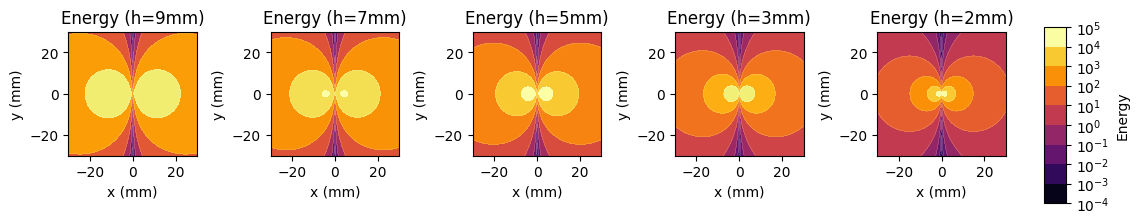

In [7]:
## motion energy for different heights

import numpy as np
import matplotlib.pyplot as plt

# Parameters
# h = 5  # height of sensor above ground (mm)
heights = [9,7,5,3,2]#[11,9,7,5,3]
r = 2  # radius of circular dot (mm)
d = 5  # speed of dot movement along x-axis (mm/s)

# Functions for theta, phi and their derivatives remain the same
def calculate_theta(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

def calculate_phi(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

def dtheta_dx(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dtheta_dx_val = (x * h) / (distance**2 * np.sqrt(distance**2 - h**2)) * 180 / np.pi
    return dtheta_dx_val

def dphi_dx(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dphi_dx_val = -r * x / (distance**2 * np.sqrt(1 - (r/distance)**2)) * 180 / np.pi
    return dphi_dx_val

def dtheta_dt(x, y, h, speed):
    return dtheta_dx(x, y, h) * speed

def dphi_dt(x, y, h, r, speed):
    return dphi_dx(x, y, h, r) * speed

def energy_abs_product(x, y, h, r, speed):
    """Absolute product of angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return np.abs(dt_dt * dp_dt)

# Create a grid of positions
rigSize = 30
x_range = np.linspace(-rigSize, rigSize, rigSize*10)  # Start at 1 to avoid division by zero issues
y_range = np.linspace(-rigSize, rigSize, rigSize*10)
X, Y = np.meshgrid(x_range, y_range)

# Visualization
fig, axs = plt.subplots(1, len(heights), figsize=(1.9*1.2*len(heights), 2.2))

for i, h in enumerate(heights):
    
    energy = energy_abs_product(X, Y, h, r, d)
    if np.any(energy > 0):  # Check if there are positive values
        norm = plt.cm.colors.LogNorm(vmin=np.max([np.min(energy[energy > 0]), 1e-10]), 
                                     vmax=np.max([np.max(energy), 1e-5]))
        im = axs[i].contourf(X, Y, energy, 20, cmap='inferno', norm=norm)
        contour32 = axs[i].contour(X, Y, energy, 20, colors='white', linewidths=0.1,  norm=norm)
    else:
        im = axs[i].contourf(X, Y, energy, 20, cmap='inferno')
        contour32 = axs[i].contour(X, Y, energy, 20, colors='white', linewidths=0.1, norm=norm)
    
    axs[i].set_title(f'Energy (h={h}mm)')
    axs[i].set_xlabel('x (mm)')
    axs[i].set_ylabel('y (mm)')
    
# Add single colorbar for dphi_dt row
cbar_ax4 = fig.add_axes([0.92, 0.05, 0.02, 0.8])  # [left, bottom, width, height]
cbar4 = fig.colorbar(im, cax=cbar_ax4, label='Energy')

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.savefig("%s/heatmap_motionEnergyl_30_differentHeights_4.svg" % savefolder)
plt.show()


In [8]:
import numpy as np
np.arctan(0.5/10)*180/np.pi * 2

5.724810452223495

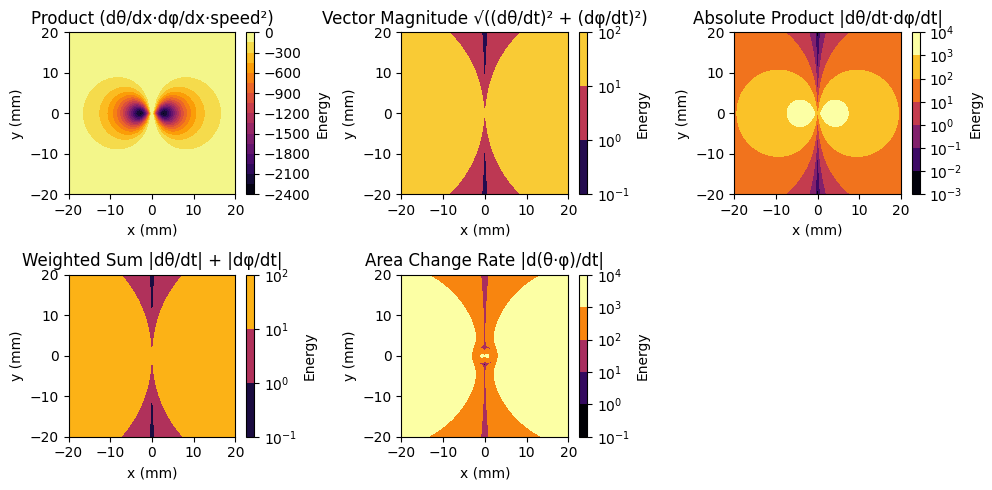

Motion energy for dots moving at 5 mm/s along x-axis:
Position (x,y) | Product | Magnitude | Abs Product | Weighted Sum | Area Change
------------------------------------------------------------------------------------------
(5, 0)        | -1711.281 |    66.249 |    1711.281 |       88.383 |   2217.391
(10, 0)        | -533.860 |    47.977 |     533.860 |       58.047 |   2837.229
(5, 5)        | -530.175 |    41.516 |     530.175 |       52.763 |   1968.513
(10, 10)        | -115.665 |    26.086 |     115.665 |       30.196 |   1777.689


In [9]:
## Display motion energy in different metrics

import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 5  # height of sensor above ground (mm)
r = 2  # radius of circular dot (mm)
d = 5  # speed of dot movement along x-axis (mm/s)

# Functions for theta, phi and their derivatives remain the same
def calculate_theta(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

def calculate_phi(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

def dtheta_dx(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dtheta_dx_val = (x * h) / (distance**2 * np.sqrt(distance**2 - h**2)) * 180 / np.pi
    return dtheta_dx_val

def dphi_dx(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    dphi_dx_val = -r * x / (distance**2 * np.sqrt(1 - (r/distance)**2)) * 180 / np.pi
    return dphi_dx_val

def dtheta_dt(x, y, h, speed):
    return dtheta_dx(x, y, h) * speed

def dphi_dt(x, y, h, r, speed):
    return dphi_dx(x, y, h, r) * speed

# Motion energy definitions
def energy_product(x, y, h, r, speed):
    """Your proposed definition (product of derivatives)"""
    return dtheta_dx(x, y, h) * dphi_dx(x, y, h, r) * speed**2

def energy_magnitude(x, y, h, r, speed):
    """Vector magnitude of angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return np.sqrt(dt_dt**2 + dp_dt**2)

def energy_abs_product(x, y, h, r, speed):
    """Absolute product of angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return np.abs(dt_dt * dp_dt)

def energy_weighted_sum(x, y, h, r, speed, w1=1.0, w2=1.0):
    """Weighted sum of absolute angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return w1 * np.abs(dt_dt) + w2 * np.abs(dp_dt)

def energy_area_change(x, y, h, r, speed):
    """Rate of change of apparent area"""
    # This is an approximation
    theta = calculate_theta(x, y, h)
    phi = calculate_phi(x, y, h, r)
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    
    # Area change rate (product rule)
    dA_dt = phi * dt_dt + theta * dp_dt
    return np.abs(dA_dt)

# Create a grid of positions
x_range = np.linspace(-20, 20, 200)  # Start at 1 to avoid division by zero issues
y_range = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(x_range, y_range)

# Calculate different energy measures
E_product = energy_product(X, Y, h, r, d)
E_magnitude = energy_magnitude(X, Y, h, r, d)
E_abs_product = energy_abs_product(X, Y, h, r, d)
E_weighted = energy_weighted_sum(X, Y, h, r, d)
E_area = energy_area_change(X, Y, h, r, d)

# Visualization
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot each energy definition
energy_maps = [
    (E_product, "Product (dθ/dx·dφ/dx·speed²)"),
    (E_magnitude, "Vector Magnitude √((dθ/dt)² + (dφ/dt)²)"),
    (E_abs_product, "Absolute Product |dθ/dt·dφ/dt|"),
    (E_weighted, "Weighted Sum |dθ/dt| + |dφ/dt|"),
    (E_area, "Area Change Rate |d(θ·φ)/dt|")
]

for i, (energy, title) in enumerate(energy_maps):
    ax = axs[i//3, i%3]
    
    # Use logarithmic scale for better visualization
    if np.any(energy > 0):  # Check if there are positive values
        norm = plt.cm.colors.LogNorm(vmin=np.max([np.min(energy[energy > 0]), 1e-10]), 
                                     vmax=np.max([np.max(energy), 1e-5]))
        im = ax.contourf(X, Y, energy, 20, cmap='inferno', norm=norm)
    else:
        im = ax.contourf(X, Y, energy, 20, cmap='inferno')
    
    ax.set_title(title)
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    plt.colorbar(im, ax=ax, label='Energy')

# Remove the empty subplot if any
if len(energy_maps) < 6:
    fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.savefig("%s/heatmap_motionEnergyl_20.svg" % savefolder)
plt.show()

# Calculate example values at specific positions
example_positions = [(5, 0), (10, 0), (5, 5), (10, 10)]
print(f"Motion energy for dots moving at {d} mm/s along x-axis:")
print("Position (x,y) | Product | Magnitude | Abs Product | Weighted Sum | Area Change")
print("-" * 90)

for x, y in example_positions:
    e1 = energy_product(x, y, h, r, d)
    e2 = energy_magnitude(x, y, h, r, d)
    e3 = energy_abs_product(x, y, h, r, d)
    e4 = energy_weighted_sum(x, y, h, r, d)
    e5 = energy_area_change(x, y, h, r, d)
    print(f"({x}, {y})        | {e1:7.3f} | {e2:9.3f} | {e3:11.3f} | {e4:12.3f} | {e5:10.3f}")
    

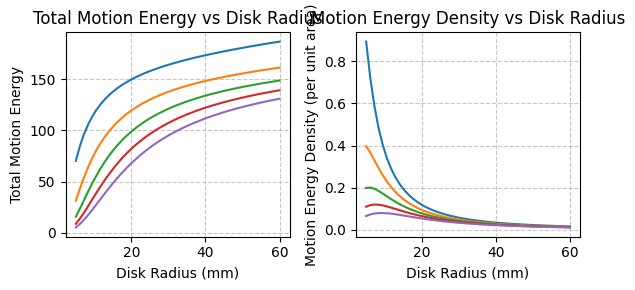

In [11]:
## Show how total motion energy of stimuli disk changes depending on the size of the disk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
hs = [3,5,7, 9,11]  # height of sensor above ground (mm)
r = 2  # radius of circular dot (mm)
d = 0.1  # speed of dot movement along x-axis (mm/s)

# Functions for calculating angles and derivatives
def calculate_theta(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    theta = np.arccos(h / distance) * 180 / np.pi
    return theta

def calculate_phi(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    phi = np.arcsin(r / distance) * 180 / np.pi
    return phi

def dtheta_dx(x, y, h):
    distance = np.sqrt(x**2 + y**2 + h**2)
    
    # Use numpy's where to handle array inputs
    denominator = distance**2 * np.sqrt(distance**2 - h**2)
    # Create a condition mask
    mask = (distance**2 <= h**2)
    
    # Use where to handle the condition
    result = np.where(mask, 0, (x * h) / denominator * 180 / np.pi)
    return result

def dphi_dx(x, y, h, r):
    distance = np.sqrt(x**2 + y**2 + h**2)
    
    # Create a condition mask
    mask = (distance <= r)
    
    # Handle array inputs
    denominator = distance**2 * np.sqrt(1 - (r/distance)**2)
    result = np.where(mask, 0, -r * x / denominator * 180 / np.pi)
    return result

def dtheta_dt(x, y, h, speed):
    return dtheta_dx(x, y, h) * speed

def dphi_dt(x, y, h, r, speed):
    return dphi_dx(x, y, h, r) * speed

# Motion energy definitions
def energy_abs_product(x, y, h, r, speed):
    """Absolute product of angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return np.abs(dt_dt * dp_dt)

def energy_magnitude(x, y, h, r, speed):
    """Vector magnitude of angular rates"""
    dt_dt = dtheta_dt(x, y, h, speed)
    dp_dt = dphi_dt(x, y, h, r, speed)
    return np.sqrt(dt_dt**2 + dp_dt**2)

# Function to calculate total energy in a disk
def calculate_total_energy(disk_radius, energy_func, h, r, speed, num_samples=500):
    """
    Calculate total energy in a disk by numerical integration.
    """
    # Create a grid of points within the disk
    theta = np.linspace(0, 2*np.pi, num_samples)
    # Start with a small positive value to avoid the origin
    radius = np.linspace(0.5, disk_radius, num_samples//10)  # Start at 0.5 instead of 0
    
    # Convert to Cartesian coordinates
    theta_grid, radius_grid = np.meshgrid(theta, radius)
    x_grid = radius_grid * np.cos(theta_grid)
    y_grid = radius_grid * np.sin(theta_grid)
    
    # Calculate energy at each point
    energy_values = energy_func(x_grid, y_grid, h, r, speed)
    
    # Integrate over the disk (using polar coordinates)
    # In polar coordinates, dA = r dr dθ
    total_energy = 0
    for i in range(len(radius)-1):
        r_inner = radius[i]
        r_outer = radius[i+1]
        r_mid = (r_inner + r_outer) / 2
        for j in range(len(theta)-1):
            theta_span = theta[j+1] - theta[j]
            area_element = r_mid * (r_outer - r_inner) * theta_span
            total_energy += energy_values[i, j] * area_element
            
    return total_energy

# Calculate total energy for different disk radii
disk_radii = np.linspace(5, 60, 50)

# plt.figure(figsize=(4, 3))
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

for h in hs:
    total_energy_abs_product = []
    
    for disk_radius in disk_radii:
        total_energy_abs_product.append(
            calculate_total_energy(disk_radius, energy_abs_product, h, r, d)
        )

    # Visualization of total energy vs disk radius
    
    axs[0].plot(disk_radii, total_energy_abs_product,)# label='Absolute Product Energy')

    # Calculate energy density (energy per unit area)
    area_of_disk = np.pi * disk_radii**2
    energy_density_abs_product = np.array(total_energy_abs_product) / area_of_disk

    axs[1].plot(disk_radii, energy_density_abs_product,)# 'b-', label='Energy Density (Absolute Product)')

axs[0].set_xlabel('Disk Radius (mm)')
axs[0].set_ylabel('Total Motion Energy')
axs[0].set_title('Total Motion Energy vs Disk Radius')
axs[0].grid(True, linestyle='--', alpha=0.7)

axs[1].set_xlabel('Disk Radius (mm)')
axs[1].set_ylabel('Motion Energy Density (per unit area)')
axs[1].set_title('Motion Energy Density vs Disk Radius')
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('%s/total_motion_energy_long_color.svg' % savefolder)
plt.show()

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/768835865.py:29: RuntimeWarning: invalid value encountered in divide
  result = np.where(mask, 0, (x * h) / denominator * 180 / np.pi)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/3692146038.py:37: RuntimeWarning: divide by zero encountered in divide
  energy_density_abs_product = np.array(total_energy_abs_product) / area_of_disk
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_7169/768835865.py:40: RuntimeWarning: invalid value encountered in divide
  result = np.where(mask, 0, -r * x / denominator * 180 / np.pi)


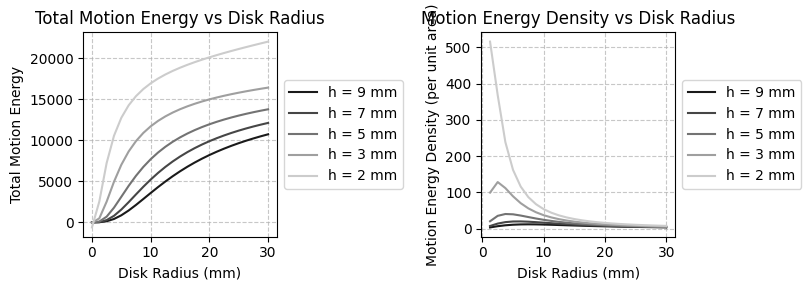

In [12]:
## Show how total motion energy of stimuli disk changes depending on the size of the disk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
hs = [9,7,5,3,2]#[3, 5, 7, 9, 11]  # height of sensor above ground (mm)
r = 2  # radius of circular dot (mm)
d = 1  # speed of dot movement along x-axis (mm/s)

# Calculate total energy for different disk radii
disk_radii = np.linspace(0, 30, 25)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # Slightly wider to accommodate the legend

# Create a grayscale colormap for the different heights
# Using darker gray for smaller heights and lighter gray for larger heights
gray_shades = np.linspace(0.1, 0.8, len(hs))  # 0 is black, 1 is white

for i, h in enumerate(hs):
    total_energy_abs_product = []
    
    for disk_radius in disk_radii:
        total_energy_abs_product.append(
            calculate_total_energy(disk_radius, energy_abs_product, h, r, d)
        )

    # Set the grayscale color for this height
    gray_color = str(gray_shades[i])
    
    # Plot total energy with grayscale
    axs[0].plot(disk_radii, total_energy_abs_product, color=gray_color, label=f'h = {h} mm')
    
    # Calculate energy density
    area_of_disk = np.pi * disk_radii**2
    energy_density_abs_product = np.array(total_energy_abs_product) / area_of_disk
    
    # Plot energy density with the same grayscale
    axs[1].plot(disk_radii, energy_density_abs_product, color=gray_color, label=f'h = {h} mm')

# Configure the first subplot
axs[0].set_xlabel('Disk Radius (mm)')
axs[0].set_ylabel('Total Motion Energy')
axs[0].set_title('Total Motion Energy vs Disk Radius')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Position legend to the right of the plot

# Configure the second subplot
axs[1].set_xlabel('Disk Radius (mm)')
axs[1].set_ylabel('Motion Energy Density (per unit area)')
axs[1].set_title('Motion Energy Density vs Disk Radius')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Position legend to the right of the plot

plt.tight_layout()
# Add extra space for the legends
plt.subplots_adjust(right=0.85)  
plt.savefig('%s/total_motion_energy_gray_30.svg' % savefolder, bbox_inches='tight')  # You may need to update the savefolder
plt.show()